# Imports

In [18]:
import numpy as np
import pandas as pd
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

# Add the parent folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.data_processing import describe_dataframe, plot_missing_values, plot_binary_target_with_stats, show_feature_distributions, plot_survival_rate_categorical, detect_outliers, plot_feature_survival_hist

# Load Data

In [19]:
train_data = pd.read_csv("../data/raw/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test_data = pd.read_csv("../data/raw/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# Create copies
titanic_train = train_data.copy()
titanic_test = test_data.copy()

# Data Exploration

### Missing Values and Data Types

In [22]:
describe_dataframe(titanic_train)

,Missing Count,Missing Percentage,Zero Count,Zero Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,0,0.000000,891,1,int64,Numerical
Survived,0,0.000000,549,0.616162,2,0,int64,Categorical
Pclass,0,0.000000,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,0,0.000000,891,"Abbing, Mr. Anthony",object,Categorical
Sex,0,0.000000,0,0.000000,2,male,object,Categorical
Age,177,0.198653,0,0.000000,88,24.0,float64,Numerical
SibSp,0,0.000000,608,0.682379,7,0,int64,Categorical
Parch,0,0.000000,678,0.760943,7,0,int64,Categorical
Ticket,0,0.000000,0,0.000000,681,1601,object,Categorical
Fare,0,0.000000,15,0.016835,248,8.05,float64,Numerical


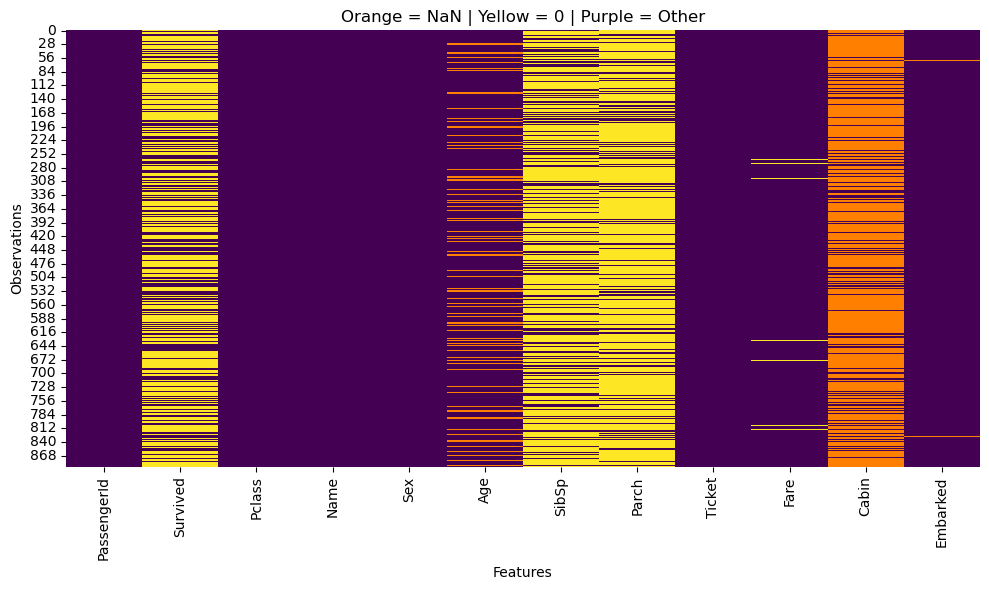

In [23]:
plot_missing_values(titanic_train, show_zeros=True)

In [24]:
describe_dataframe(titanic_test)

,Missing Count,Missing Percentage,Zero Count,Zero Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,0,0.000000,418,892,int64,Numerical
Pclass,0,0.000000,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,0,0.000000,418,"Abbott, Master. Eugene Joseph",object,Categorical
Sex,0,0.000000,0,0.000000,2,male,object,Categorical
Age,86,0.205742,0,0.000000,79,21.0,float64,Numerical
SibSp,0,0.000000,283,0.677033,7,0,int64,Categorical
Parch,0,0.000000,324,0.775120,8,0,int64,Categorical
Ticket,0,0.000000,0,0.000000,363,PC 17608,object,Categorical
Fare,1,0.002392,2,0.004785,169,7.75,float64,Numerical
Cabin,327,0.782297,0,0.000000,76,B57 B59 B63 B66,object,Categorical


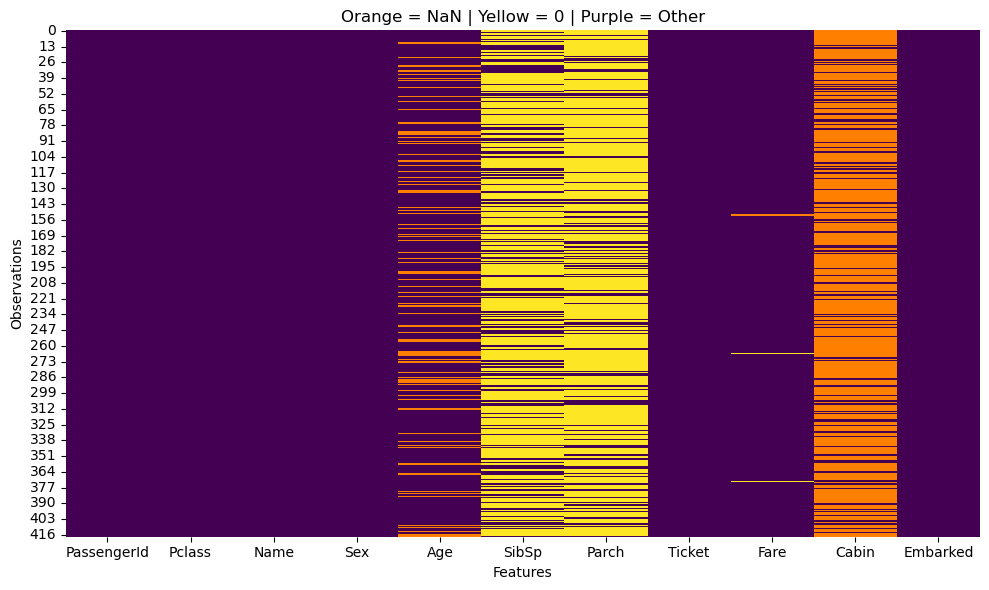

In [25]:
plot_missing_values(titanic_test, show_zeros=True)

### Target Distribution

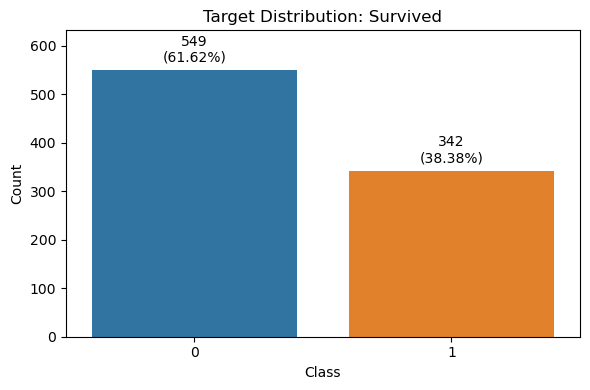

In [26]:
plot_binary_target_with_stats(titanic_train["Survived"], target_col="Survived")


### Feature Distributions

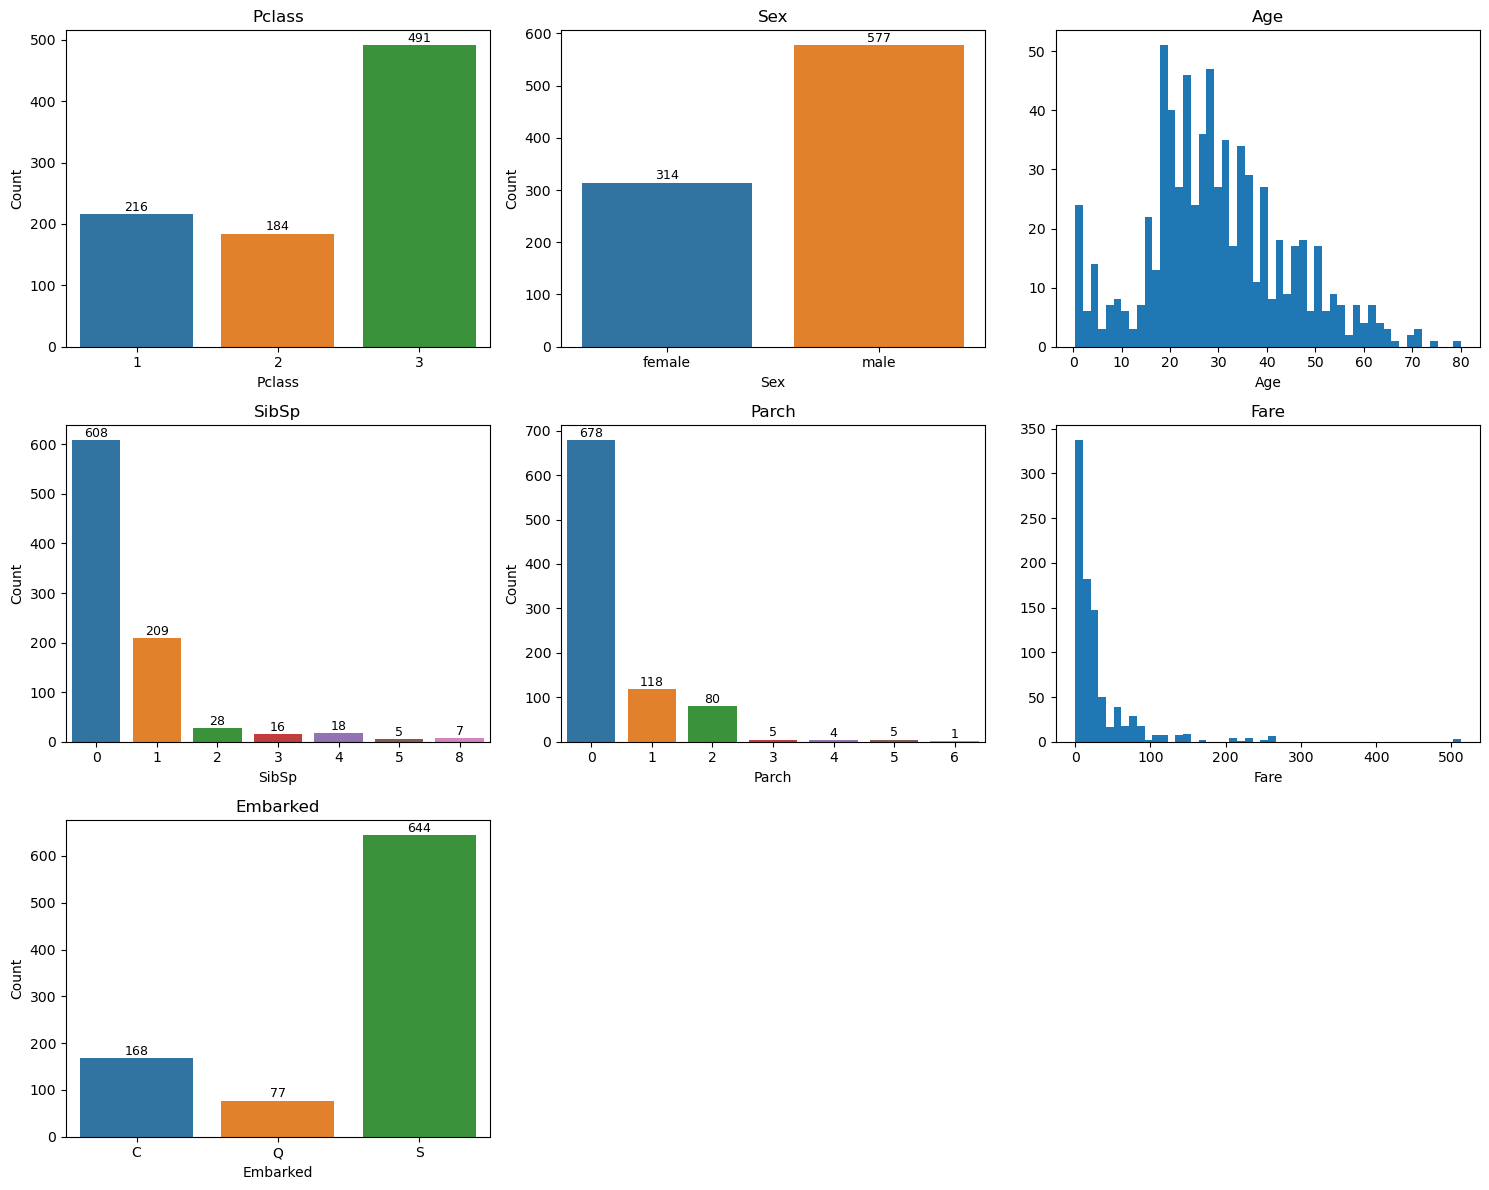

In [27]:
show_feature_distributions(
    titanic_train,
    titanic_train.columns,
    n_cols=3,
    cat_max_unique=10,
    exclude_cols=["PassengerId", "Survived"]
)

### Survival Rate per Feature

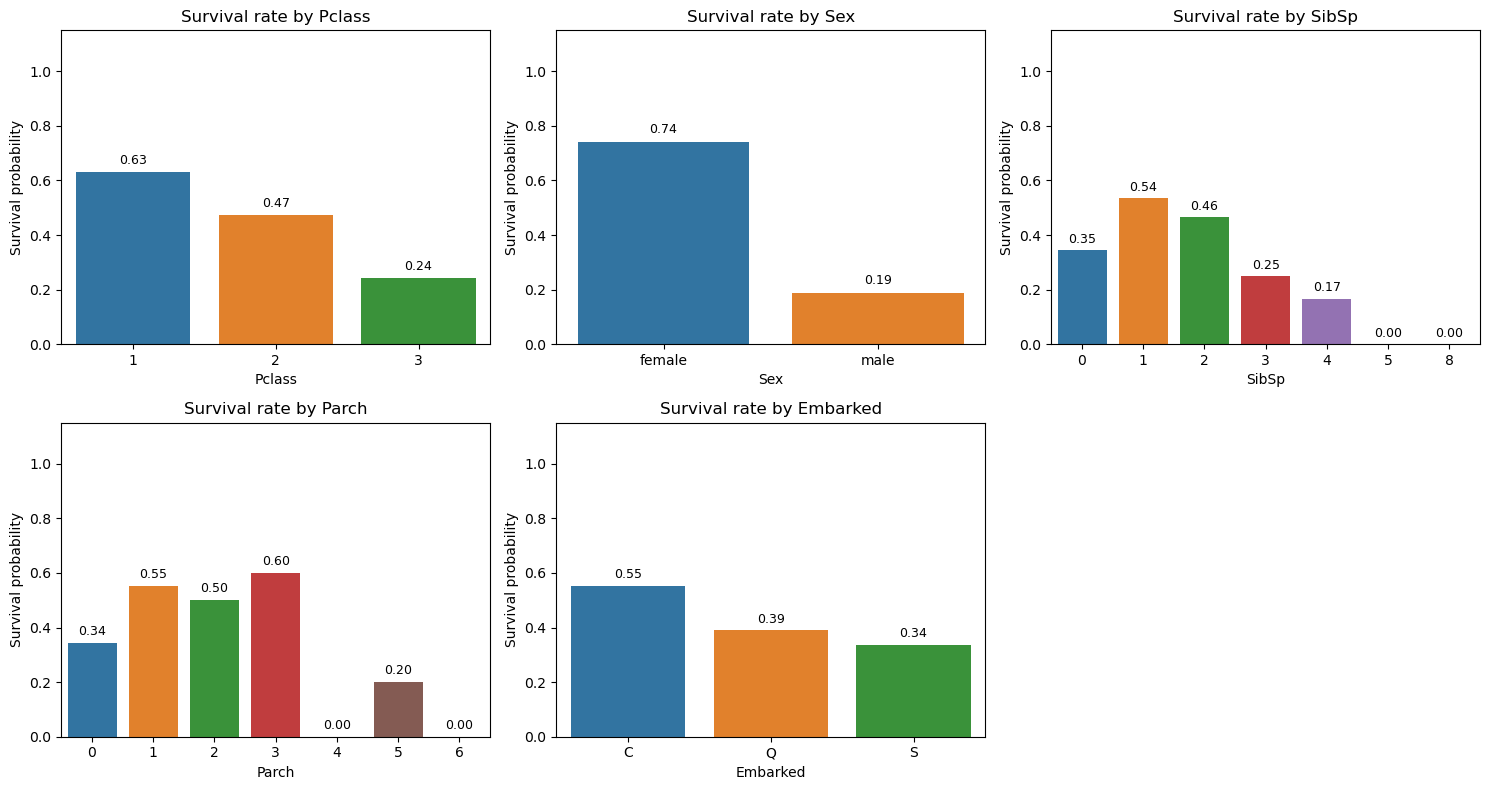

In [28]:
plot_survival_rate_categorical(
    titanic_train,
    titanic_train["Survived"],
    exclude_cols=["Survived", "PassengerId", "Name", "Ticket", "Cabin"]
)

### PassengerID

### Pclass

### Name

Extract Title from Name

### Sex

### Age

Outlier Detection

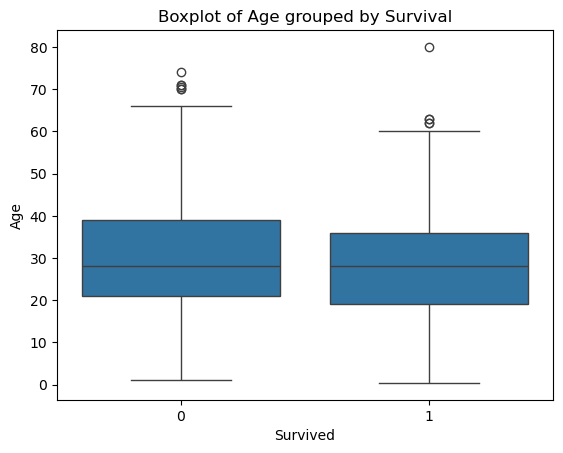

Median Age by Survival:
Survived
0    28.0
1    28.0
Name: Age, dtype: float64


In [29]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Age', data=titanic_train)
plt.title("Boxplot of Age grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Age by Survival:")
print(titanic_train.groupby("Survived")["Age"].median())

# Detect Outliers per Group
outliers = detect_outliers(titanic_train, col="Age", group_cols="Survived", show=False)

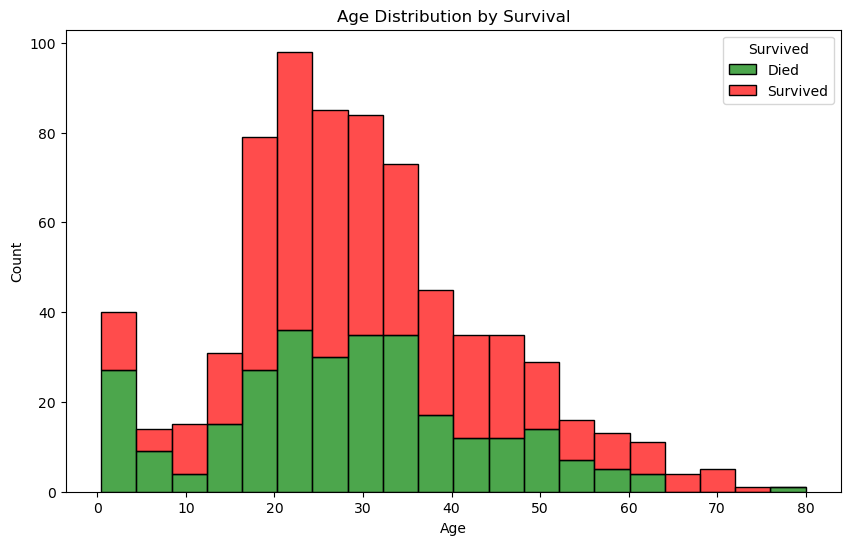

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=titanic_train,
    x="Age",
    hue="Survived",        # split by survival
    multiple="stack",      # stack the bars
    bins=20,               # number of bins
    palette={0:"red", 1:"green"},
    alpha=0.7
)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Died", "Survived"])
plt.show()


### SibSp + Parch

In [32]:
# Compute FamSize and Type

### Ticket

Count Ticket Frequency

In [33]:
titanic_train.Ticket.value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

### Fare

log transform!!!

Zero Values

In [34]:
titanic_train[(titanic_train.Fare==0)].iloc[:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Outlier Detection

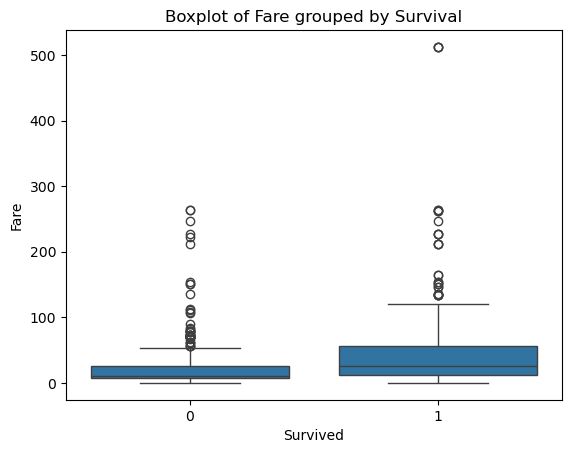

Median Fare by Survival:
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


In [35]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Fare', data=titanic_train)
plt.title("Boxplot of Fare grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Fare by Survival:")
print(titanic_train.groupby("Survived")["Fare"].median())

# Detect Outliers per Group
outliers = detect_outliers(titanic_train, col="Fare", group_cols="Survived", show=False)

In [36]:
print(outliers.to_string())

     PassengerId  Survived  Pclass                                                      Name     Sex    Age  SibSp  Parch        Ticket      Fare            Cabin Embarked
27            28         0       1                            Fortune, Mr. Charles Alexander    male  19.00      3      2         19950  263.0000      C23 C25 C27        S
34            35         0       1                                   Meyer, Mr. Edgar Joseph    male  28.00      1      0      PC 17604   82.1708              NaN        C
54            55         0       1                            Ostby, Mr. Engelhart Cornelius    male  65.00      0      1        113509   61.9792              B30        C
62            63         0       1                               Harris, Mr. Henry Birkhardt    male  45.00      1      0         36973   83.4750              C83        S
72            73         0       2                                      Hood, Mr. Ambrose Jr    male  21.00      0      0  S.O.C. 14879   73

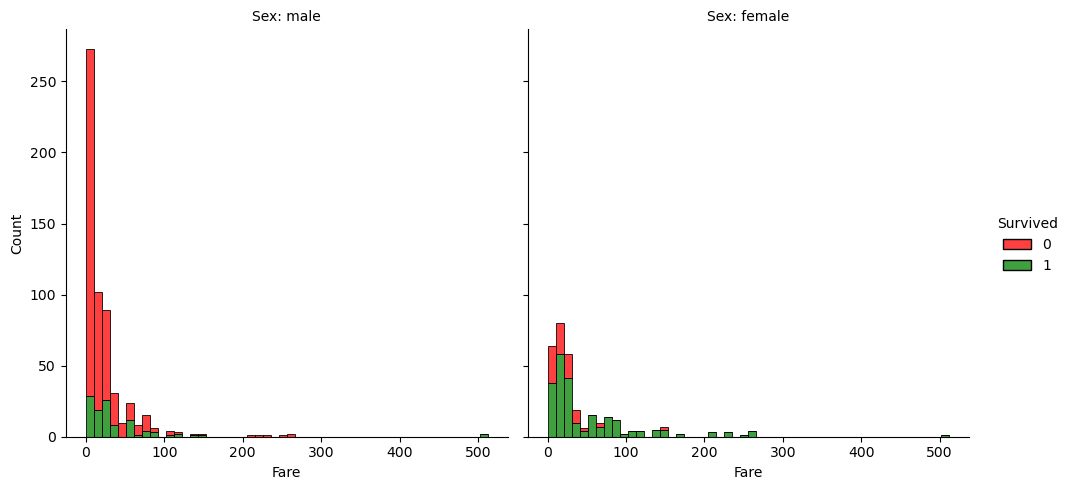

In [69]:
# FacetGrid: separate by Sex
g = sns.displot(
    data=titanic_train,
    x="Fare",
    hue="Survived",
    col="Sex",             # separate plots per Sex
    multiple="stack",      # stack survived/died within each bin
    bins=50,
    palette={0:"red", 1:"green"},
    height=5,
    aspect=1
)

g.set_axis_labels("Fare", "Count")
g.set_titles("Sex: {col_name}")
g._legend.set_title("Survived")
plt.show()


### Cabin

In [37]:
# Extract deck
# Multi cabins

### Embarked

### Age + Sex

Outlier Detection by Age

In [38]:
# Detect Outliers per Survived/Sex group
outliers = detect_outliers(titanic_train, col="Age", group_cols=["Survived", "Sex"], show=True)


0 outliers in Age for {'Survived': np.int64(0), 'Sex': 'female'}:
Empty DataFrame
Columns: [Age, Survived, Sex]
Index: []

7 outliers in Age for {'Survived': np.int64(0), 'Sex': 'male'}:
      Age  Survived   Sex
33   66.0         0  male
96   71.0         0  male
116  70.5         0  male
493  71.0         0  male
672  70.0         0  male
745  70.0         0  male
851  74.0         0  male

0 outliers in Age for {'Survived': np.int64(1), 'Sex': 'female'}:
Empty DataFrame
Columns: [Age, Survived, Sex]
Index: []

1 outliers in Age for {'Survived': np.int64(1), 'Sex': 'male'}:
      Age  Survived   Sex
630  80.0         1  male


Boxplot

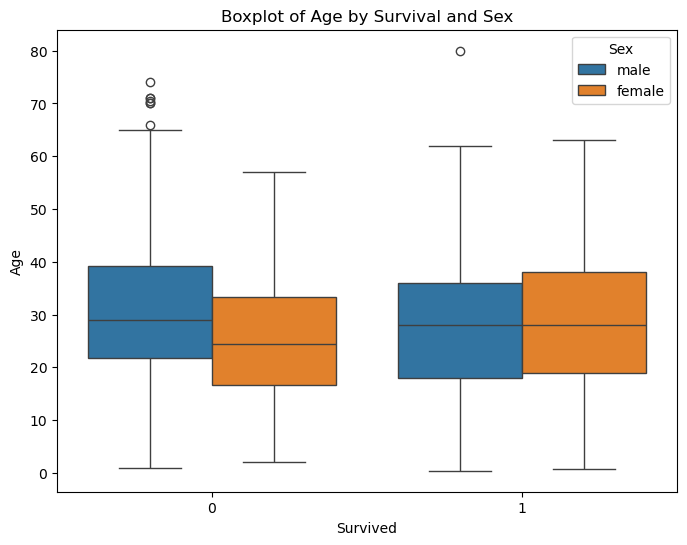

Median Age by Survival and Sex:
Survived  Sex   
0         female    24.5
          male      29.0
1         female    28.0
          male      28.0
Name: Age, dtype: float64


In [39]:
# Boxplot of Age by Survived, separated by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=titanic_train, showfliers=True)
plt.title("Boxplot of Age by Survival and Sex")
plt.ylabel("Age")
plt.xlabel("Survived")
plt.legend(title="Sex")
plt.show()

# Median Age by Survived and Sex
print("Median Age by Survival and Sex:")
print(titanic_train.groupby(["Survived", "Sex"])["Age"].median())

Distribution

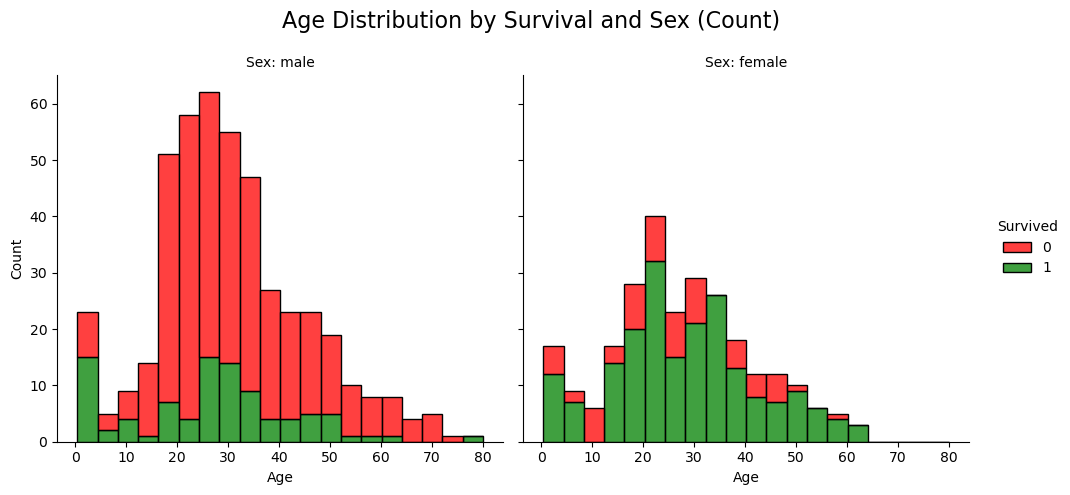

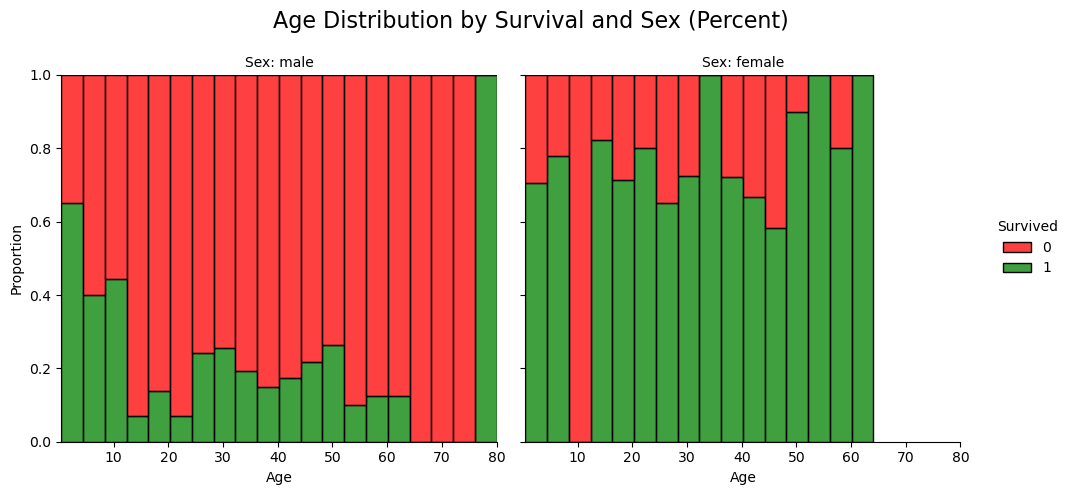

In [40]:
# Age in counts
plot_feature_survival_hist(titanic_train, feature="Age", percent=False)
# Age in percent
plot_feature_survival_hist(titanic_train, feature="Age", percent=True)

Female passengers show consistently higher survival proportions across nearly all age groups, while male survival is strongly concentrated among children.

### Fare & Sex

Outlier Detection by Age

In [41]:
# Detect Outliers per Survived/Sex group
outliers = detect_outliers(titanic_train, col="Fare", group_cols=["Survived", "Sex"], show=True)


5 outliers in Fare for {'Survived': np.int64(0), 'Sex': 'female'}:
       Fare  Survived     Sex
180   69.55         0  female
297  151.55         0  female
498  151.55         0  female
792   69.55         0  female
863   69.55         0  female

38 outliers in Fare for {'Survived': np.int64(0), 'Sex': 'male'}:
         Fare  Survived   Sex
27   263.0000         0  male
34    82.1708         0  male
54    61.9792         0  male
62    83.4750         0  male
72    73.5000         0  male
92    61.1750         0  male
102   77.2875         0  male
118  247.5208         0  male
120   73.5000         0  male
124   77.2875         0  male
139   79.2000         0  male
155   61.3792         0  male
159   69.5500         0  male
169   56.4958         0  male
201   69.5500         0  male
245   90.0000         0  male
262   79.6500         0  male
324   69.5500         0  male
332  153.4625         0  male
336   66.6000         0  male
373  135.6333         0  male
377  211.5000         0  

Boxplot

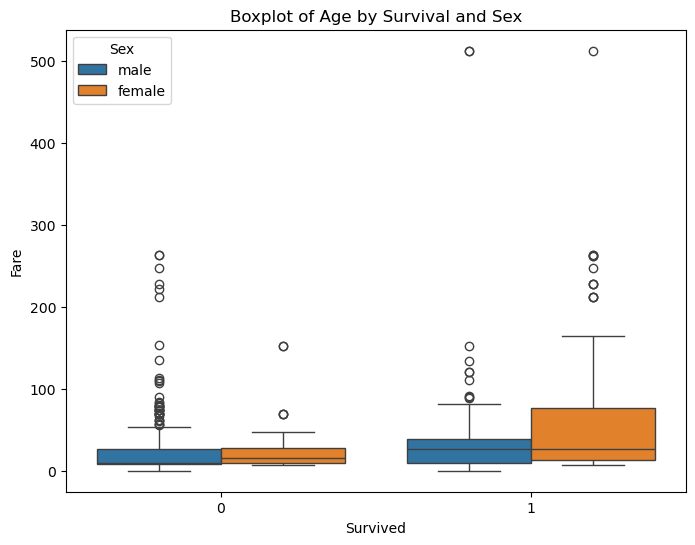

Median Fare by Survival and Sex:
Survived  Sex   
0         female    15.24580
          male       9.41665
1         female    26.00000
          male      26.28750
Name: Fare, dtype: float64


In [42]:
# Boxplot of Age by Survived, separated by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=titanic_train, showfliers=True)
plt.title("Boxplot of Age by Survival and Sex")
plt.ylabel("Fare")
plt.xlabel("Survived")
plt.legend(title="Sex")
plt.show()

# Median Age by Survived and Sex
print("Median Fare by Survival and Sex:")
print(titanic_train.groupby(["Survived", "Sex"])["Fare"].median())

Distribution

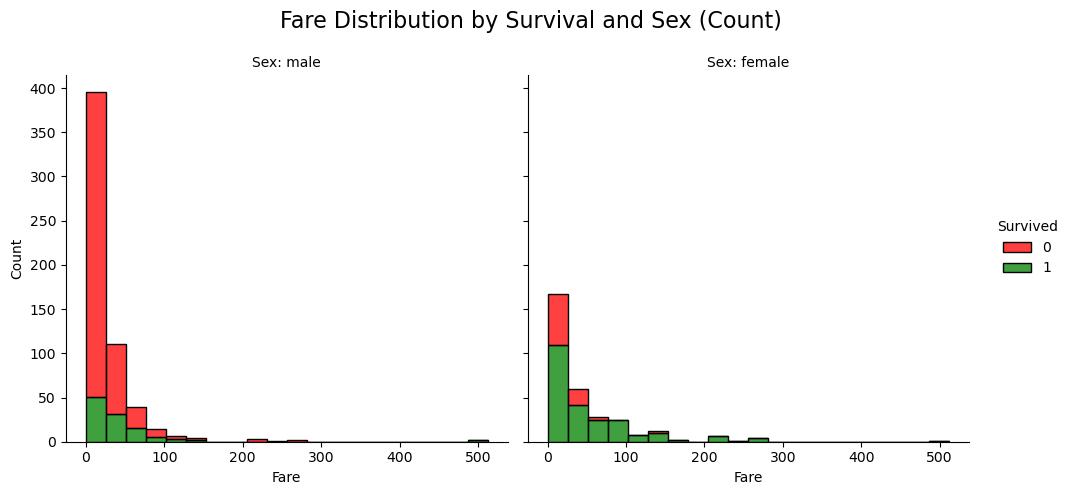

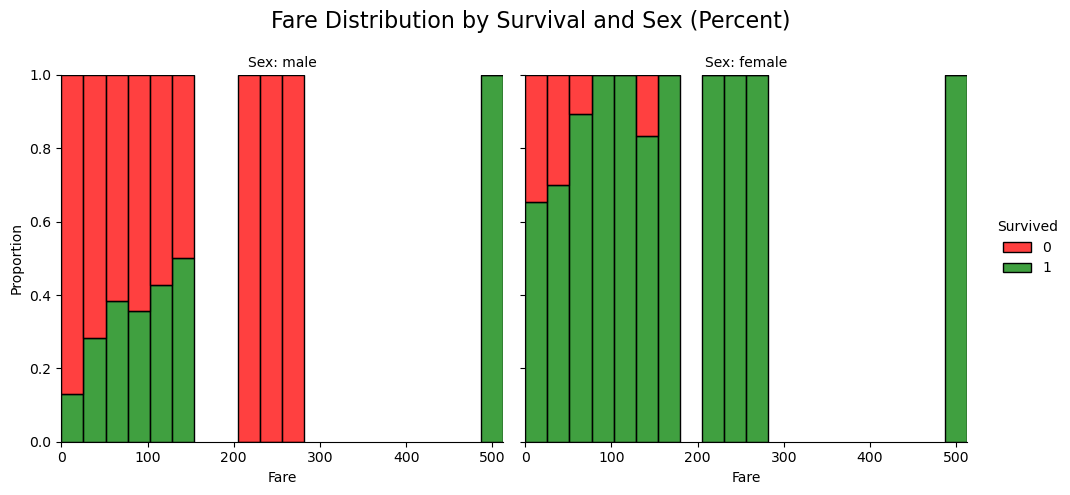

In [43]:
# Fare in counts
plot_feature_survival_hist(titanic_train, feature="Fare", percent=False)
# Fare in percent
plot_feature_survival_hist(titanic_train, feature="Fare", percent=True)

Fare > 500

In [ ]:
titanic_train[titanic_train.Fare >500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


200 < Fare < 500

In [51]:
titanic_train[(titanic_train.Fare > 200) & (titanic_train.Fare < 500) & (titanic_train.Sex=="male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [52]:
titanic_train[(titanic_train.Fare > 200) & (titanic_train.Fare < 500) & (titanic_train.Sex=="female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


### Fare & Embarked

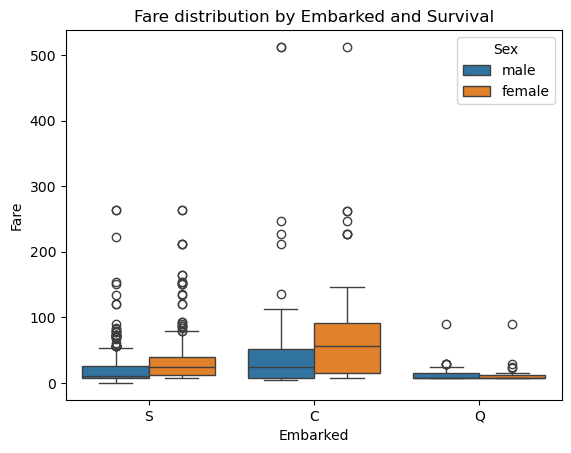

Median Fare by Survival and Sex:
Embarked  Sex   
C         female    56.92920
          male      24.00000
Q         female     7.76875
          male       7.75000
S         female    24.15000
          male      10.50000
Name: Fare, dtype: float64
Embarked  Sex     Pclass
C         female  1          43
                  2           7
                  3          23
          male    1          42
                  2          10
                  3          43
Q         female  1           1
                  2           2
                  3          33
          male    1           1
                  2           1
                  3          39
S         female  1          48
                  2          67
                  3          88
          male    1          79
                  2          97
                  3         265
Name: Fare, dtype: int64


In [68]:
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=titanic_train)
plt.title("Fare distribution by Embarked and Survival")
plt.show()

# Median Age by Survived and Sex
print("Median Fare by Survival and Sex:")
print(titanic_train.groupby(["Embarked", "Sex"])["Fare"].median())
print(titanic_train.groupby(["Embarked", "Sex", "Pclass"])["Fare"].count())


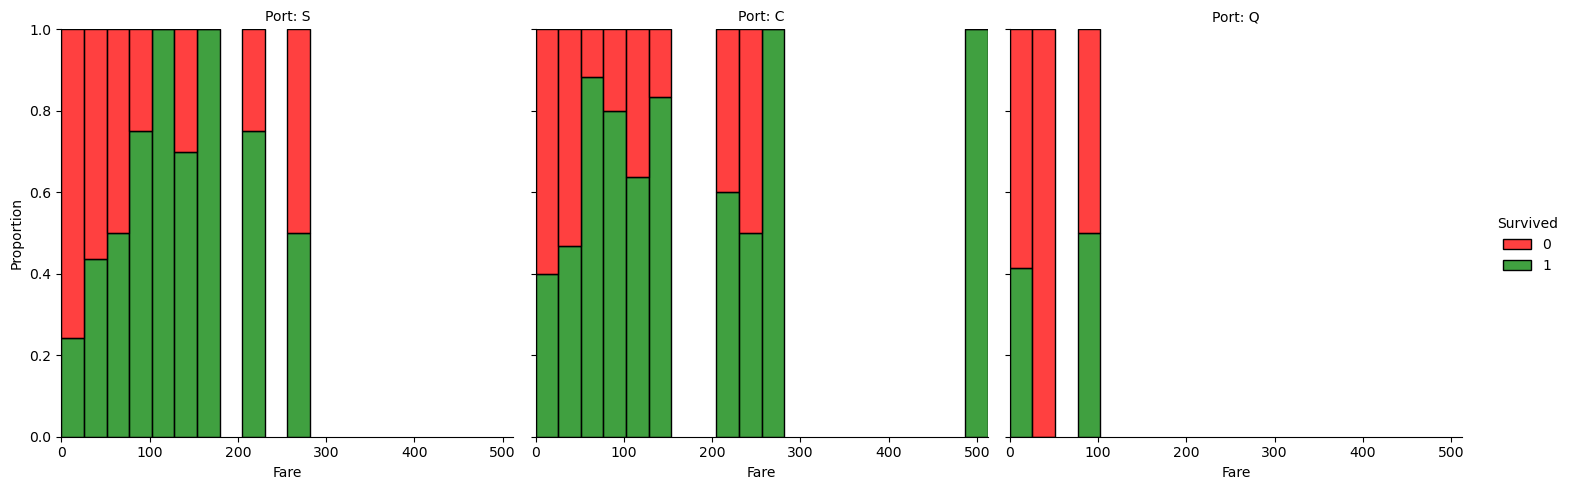

In [59]:
g = sns.displot(
    data=titanic_train,
    x="Fare",
    hue="Survived",
    col="Embarked",
    multiple="fill",
    bins=20,
    palette={0:"red", 1:"green"}
)
g.set_axis_labels("Fare", "Proportion")
g.set_titles("Port: {col_name}")
plt.show()
